## import libraries

In [127]:
import numpy as np
import matplotlib.pyplot as plt

## inputs of the model

In [128]:
# x, y inputs
x_n_list = np.array([[0,0], [0, 1], [1, 0], [1, 1]])
y_n_list = np.array([[-1], [1], [1], [-1]])
# we choose the parameters
epochs = 3000
learning_rate = 0.01
#choose defined seed
np.random.seed(2)
# Random initial selection for the parameters
# with a bias towards the parameters we chose in question 2
w = np.random.rand(2) + np.array([-2, 4])
U = np.random.rand(2, 2) + 1
b_1 = np.random.rand(2) + np.array([-1, -0.5])
b_2 = np.random.rand(1) - 0.5
#w = np.random.normal(loc = 0, scale = 0.1, size = 2) + np.array([-2, 4])
#U = np.random.normal(loc = 0, scale = 0.1, size = (2, 2)) + 1
#b_1 = np.random.normal(loc = 0, scale = 0.1, size = 2) + np.array([-1, -0.5])
#b_2 = np.random.normal(loc = 0, scale = 0.1, size = 1) - 0.5
# Initialize Intermediate Variables for each data point
h = np.zeros((4, 2))
f_x = np.zeros((4, 1))
Loss_array = np.zeros(epochs)


## h and f(x)

In [129]:
def h_func(U, b1, x):
    h_positive = U.T @ x + b1
    return np.array([max(h_positive[0], [0]), max(h_positive[1], [0])])

def f_x_func(w, h, b2):
    return w.T @ h + b2

## Squared loss function

In [130]:
def Loss_func(y_true, y_pred):
    return (y_pred - y_true) ** 2
   

## Derivatives

In [131]:
def derieve_to_db1(y_pred, y_true, w, h):
    derieve_if_h_positive = 2 * (y_pred - y_true) * w
    if derieve_if_h_positive > 0:
        return derieve_if_h_positive
    else:
        return 0

def derieve_to_dU(y_pred, y_true, w, x, h):
    derieve_if_h_positive = 2 * (y_pred - y_true) * w * x
    if derieve_if_h_positive > 0:
        return derieve_if_h_positive
    else:
        return 0

def derieve_to_db2(y_true, y_pred):
    return 2 * (y_pred - y_true)

def derieve_to_dw(y_true, y_pred, h):
    return 2 * h * (y_pred - y_true)
    

## Training loop

w is: [-0.98081511  0.33317216]
b_2 is: [4.01444539e-17]
U is: [[-1.61883411 -1.7331742 ]
 [-1.74812879 -1.83816177]]
b_1 is: [-8.3375526  -6.99144575]


Text(0, 0.5, 'LOSS')

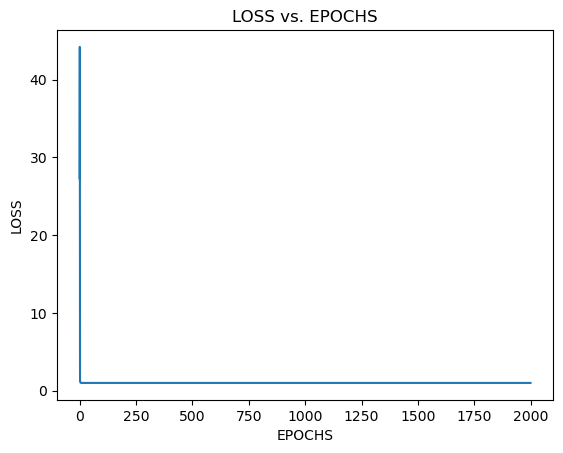

In [132]:
for epoch in range(epochs):
    dL_db1 = np.zeros((4, 2))
    dL_dU = np.zeros((2, 2))
    for data_point in range(len(x_n_list)):
        temp = U @ x_n_list[data_point] + b_1
        h[data_point, 0] = max(temp[0], 0)
        h[data_point, 1] = max(temp[1], 0)
        f_x[data_point] = w @ h[data_point] + b_2
        for dim_1 in range(len(w.T)):
            dL_db1[data_point, dim_1] = 2*(f_x[data_point]-y_n_list[data_point])*w[dim_1] if h[data_point, dim_1] > 0 else 0
            for dim_2 in range(len(U)):
                derive = 2*(f_x[data_point]-y_n_list[data_point])*w[dim_1]*x_n_list[data_point, dim_2]
                dL_dU[dim_1, dim_2] = derive if h[data_point, dim_1] > 0 else 0

    Loss_array[epoch] = (sum((y_n_list - f_x) ** 2))/4

    dL_dw = 2*sum((y_n_list-f_x)*(-h))  # dL_d(y_n_list-f_x)*d(y_n_list-f_x)_dw
    dL_db2 = 2*sum(f_x-y_n_list)

    w -= learning_rate * dL_dw
    b_2 -= learning_rate * dL_db2
    U -= learning_rate * sum(dL_dU)
    b_1 -= learning_rate * sum(dL_db1)


print(f"w is: {w}")
print(f"b_2 is: {b_2}")
print(f"U is: {U}")
print(f"b_1 is: {b_1}")

plt.plot(range(epochs), Loss_array)
plt.title("LOSS vs. EPOCHS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")


